In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import janitor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype

In [2]:
train = pd.read_csv("../data/churn-bigml-80.csv").clean_names()
#df

In [3]:
#train, test = train_test_split(df, train_size=0.8, random_state=42, stratify=df["leaveornot"])

In [4]:
#train.to_csv("../data/train.csv", index=False)
#test.to_csv("../data/test.csv", index=False)

In [5]:
train.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [6]:
train.shape

(2666, 20)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account_length          2666 non-null   int64  
 2   area_code               2666 non-null   int64  
 3   international_plan      2666 non-null   object 
 4   voice_mail_plan         2666 non-null   object 
 5   number_vmail_messages   2666 non-null   int64  
 6   total_day_minutes       2666 non-null   float64
 7   total_day_calls         2666 non-null   int64  
 8   total_day_charge        2666 non-null   float64
 9   total_eve_minutes       2666 non-null   float64
 10  total_eve_calls         2666 non-null   int64  
 11  total_eve_charge        2666 non-null   float64
 12  total_night_minutes     2666 non-null   float64
 13  total_night_calls       2666 non-null   int64  
 14  total_night_charge      2666 non-null   

In [8]:
train["international_plan"].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
train["voice_mail_plan"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
train["area_code"].unique()

array([415, 408, 510])

In [11]:
train["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [12]:
region = pd.read_csv("../data/us.csv")
region = region[["State Code", "Region"]]
 
train = train.merge(region, how = "left", left_on = "state", right_on = "State Code").clean_names()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   object 
 1   account_length          2666 non-null   int64  
 2   area_code               2666 non-null   int64  
 3   international_plan      2666 non-null   object 
 4   voice_mail_plan         2666 non-null   object 
 5   number_vmail_messages   2666 non-null   int64  
 6   total_day_minutes       2666 non-null   float64
 7   total_day_calls         2666 non-null   int64  
 8   total_day_charge        2666 non-null   float64
 9   total_eve_minutes       2666 non-null   float64
 10  total_eve_calls         2666 non-null   int64  
 11  total_eve_charge        2666 non-null   float64
 12  total_night_minutes     2666 non-null   float64
 13  total_night_calls       2666 non-null   int64  
 14  total_night_charge      2666 non-null   

In [13]:
### converting specific columns
train["international_plan"] = train["international_plan"].astype("category")
train["voice_mail_plan"] = train["voice_mail_plan"].astype("category")
train["area_code"] = train["area_code"].astype("category")
train["region"] = train["region"].astype("category")

In [14]:
train.to_csv("../data/train.csv", index=False)

In [15]:
test = pd.read_csv("../data/churn-bigml-20.csv").clean_names()
test = test.merge(region, how = "left", left_on = "state", right_on = "State Code").clean_names()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   667 non-null    object 
 1   account_length          667 non-null    int64  
 2   area_code               667 non-null    int64  
 3   international_plan      667 non-null    object 
 4   voice_mail_plan         667 non-null    object 
 5   number_vmail_messages   667 non-null    int64  
 6   total_day_minutes       667 non-null    float64
 7   total_day_calls         667 non-null    int64  
 8   total_day_charge        667 non-null    float64
 9   total_eve_minutes       667 non-null    float64
 10  total_eve_calls         667 non-null    int64  
 11  total_eve_charge        667 non-null    float64
 12  total_night_minutes     667 non-null    float64
 13  total_night_calls       667 non-null    int64  
 14  total_night_charge      667 non-null    fl

In [16]:
test.to_csv("../data/test.csv", index=False)

In [17]:
train.head()

state  account_length area_code international_plan voice_mail_plan  \
0    KS             128       415                 No             Yes   
1    OH             107       415                 No             Yes   
2    NJ             137       415                 No              No   
3    OH              84       408                Yes              No   
4    OK              75       415                Yes              No   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  ...  total_night_minutes  \
0             45.07              197.4  ...                244.7   
1             27.47              195.5  ...                254.4   
2             41.38              121.2  ...                162.6   
3             50.90               61.9  ...                196.9   
4             28.34              148.3  ...                186.9   

   total_night_calls  total_night_charge  total_intl_minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   total_intl_calls  total_intl_charge  customer_service_calls  churn  \
0                 3               2.70                       1  False   
1                 3               3.70                       1  False   
2                 5               3.29                       0  False   
3                 7               1.78                       2  False   
4                 3               2.73                       3  False   

   state_code     region  
0          KS    Midwest  
1          OH    Midwest  
2          NJ  Northeast  
3          OH    Midwest  
4          OK      South  

[5 rows x 22 columns]

In [18]:
train = train.drop(["state", "state_code"], axis = 1)

### Univariate analysis

In [19]:
def cat_eda(var):
    plt.figure(figsize=(15,10))
    sns.countplot(x = var, data = train, hue  = "churn")
    plt.show();

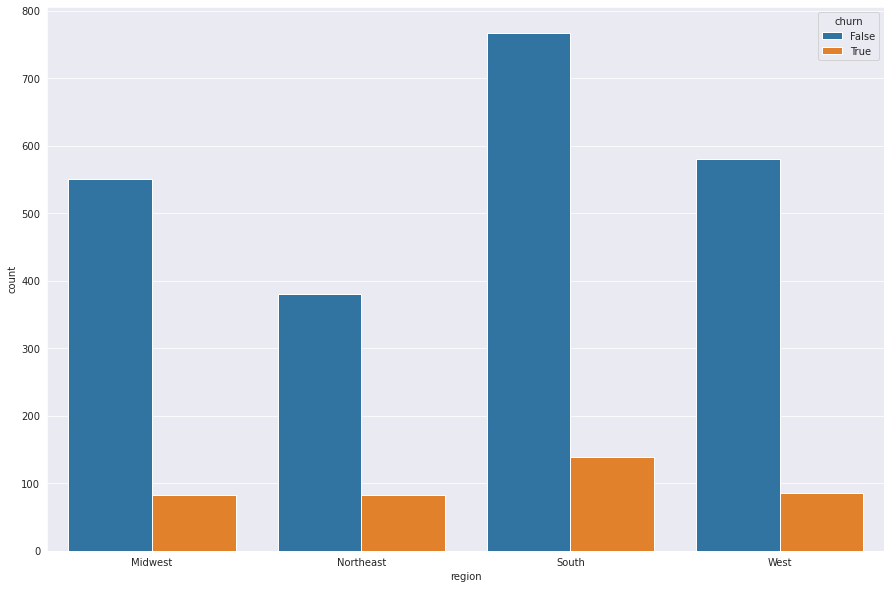

In [20]:
cat_eda("region")

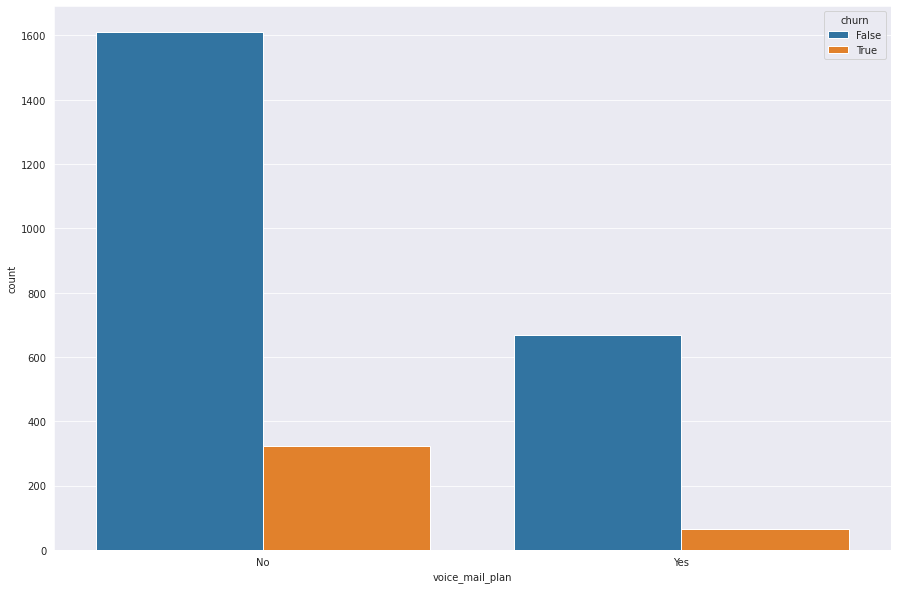

In [21]:
cat_eda("voice_mail_plan")

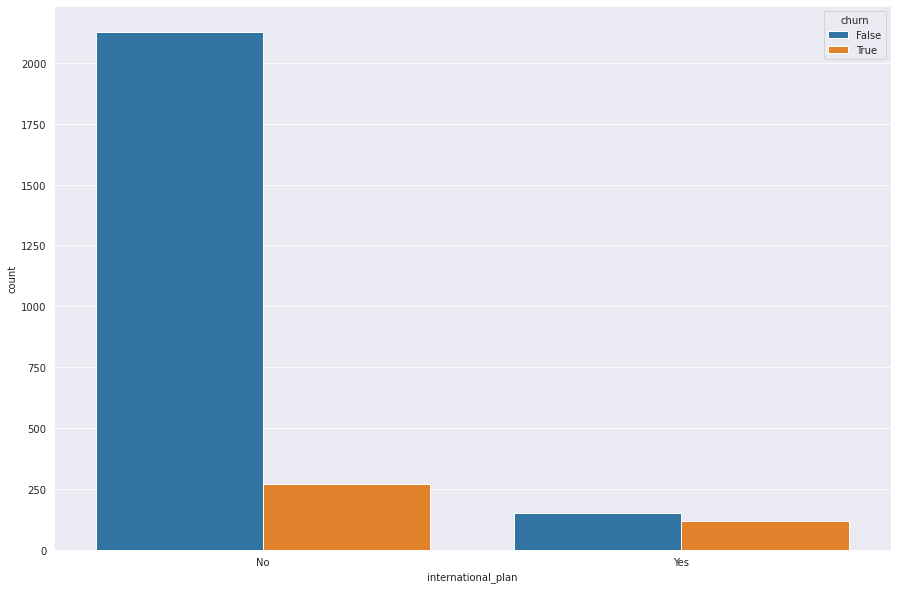

In [22]:
cat_eda("international_plan")

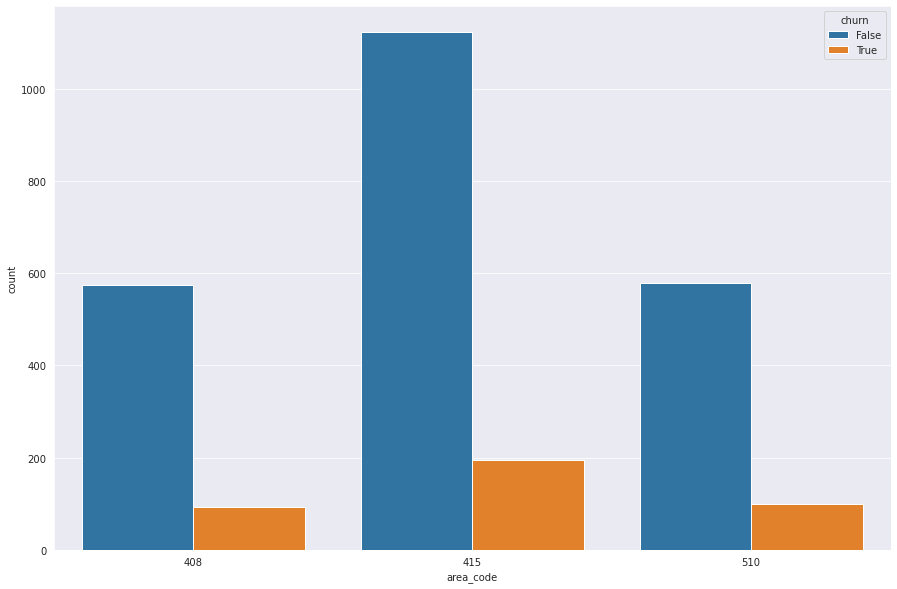

In [23]:
cat_eda("area_code")

In [24]:
def num_eda(var):
    plt.figure(figsize=(15,10))
    sns.kdeplot(x = var, data = train, hue  = "churn")
    plt.show(); 

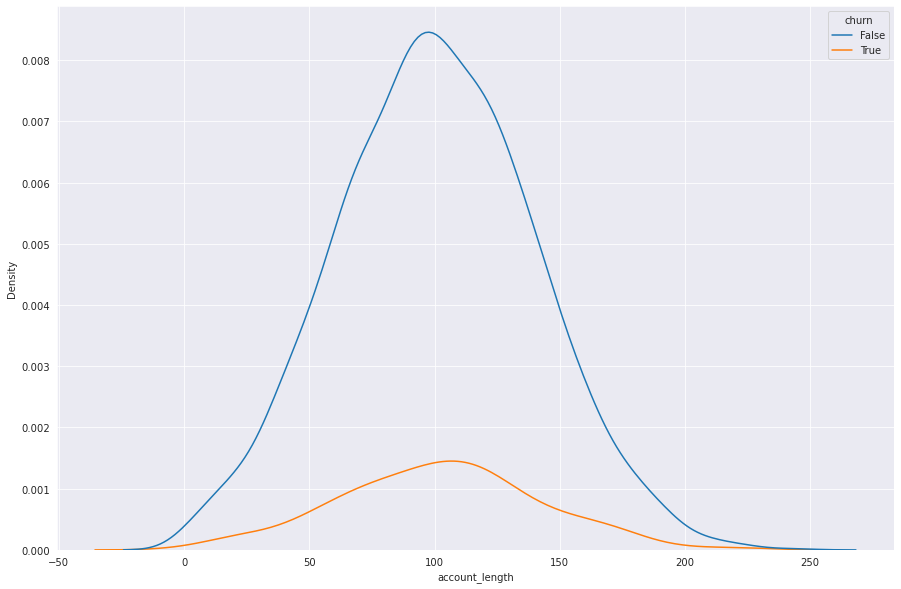

In [25]:
num_eda("account_length")

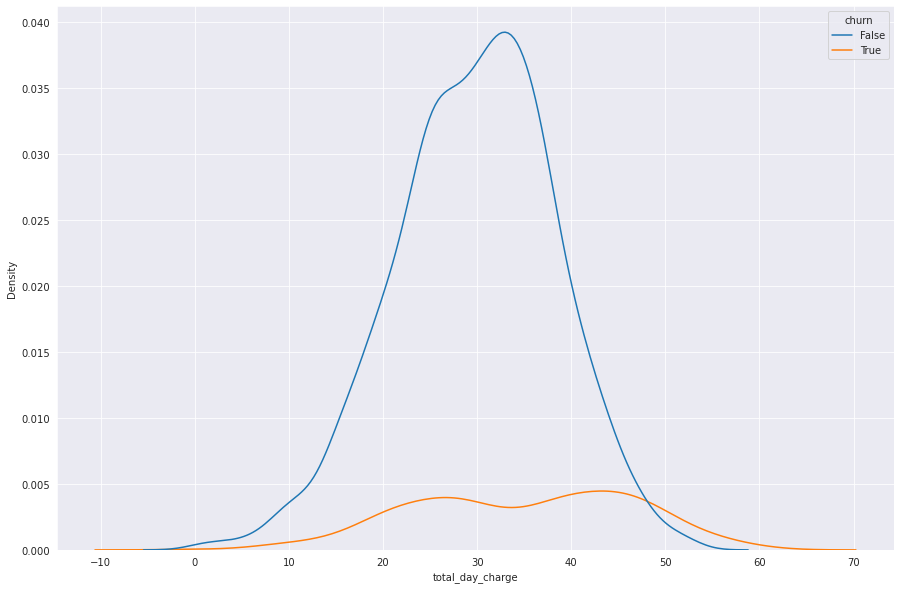

In [26]:
num_eda("total_day_charge")

### Multivariate Analysis

<Figure size 2880x1440 with 0 Axes>

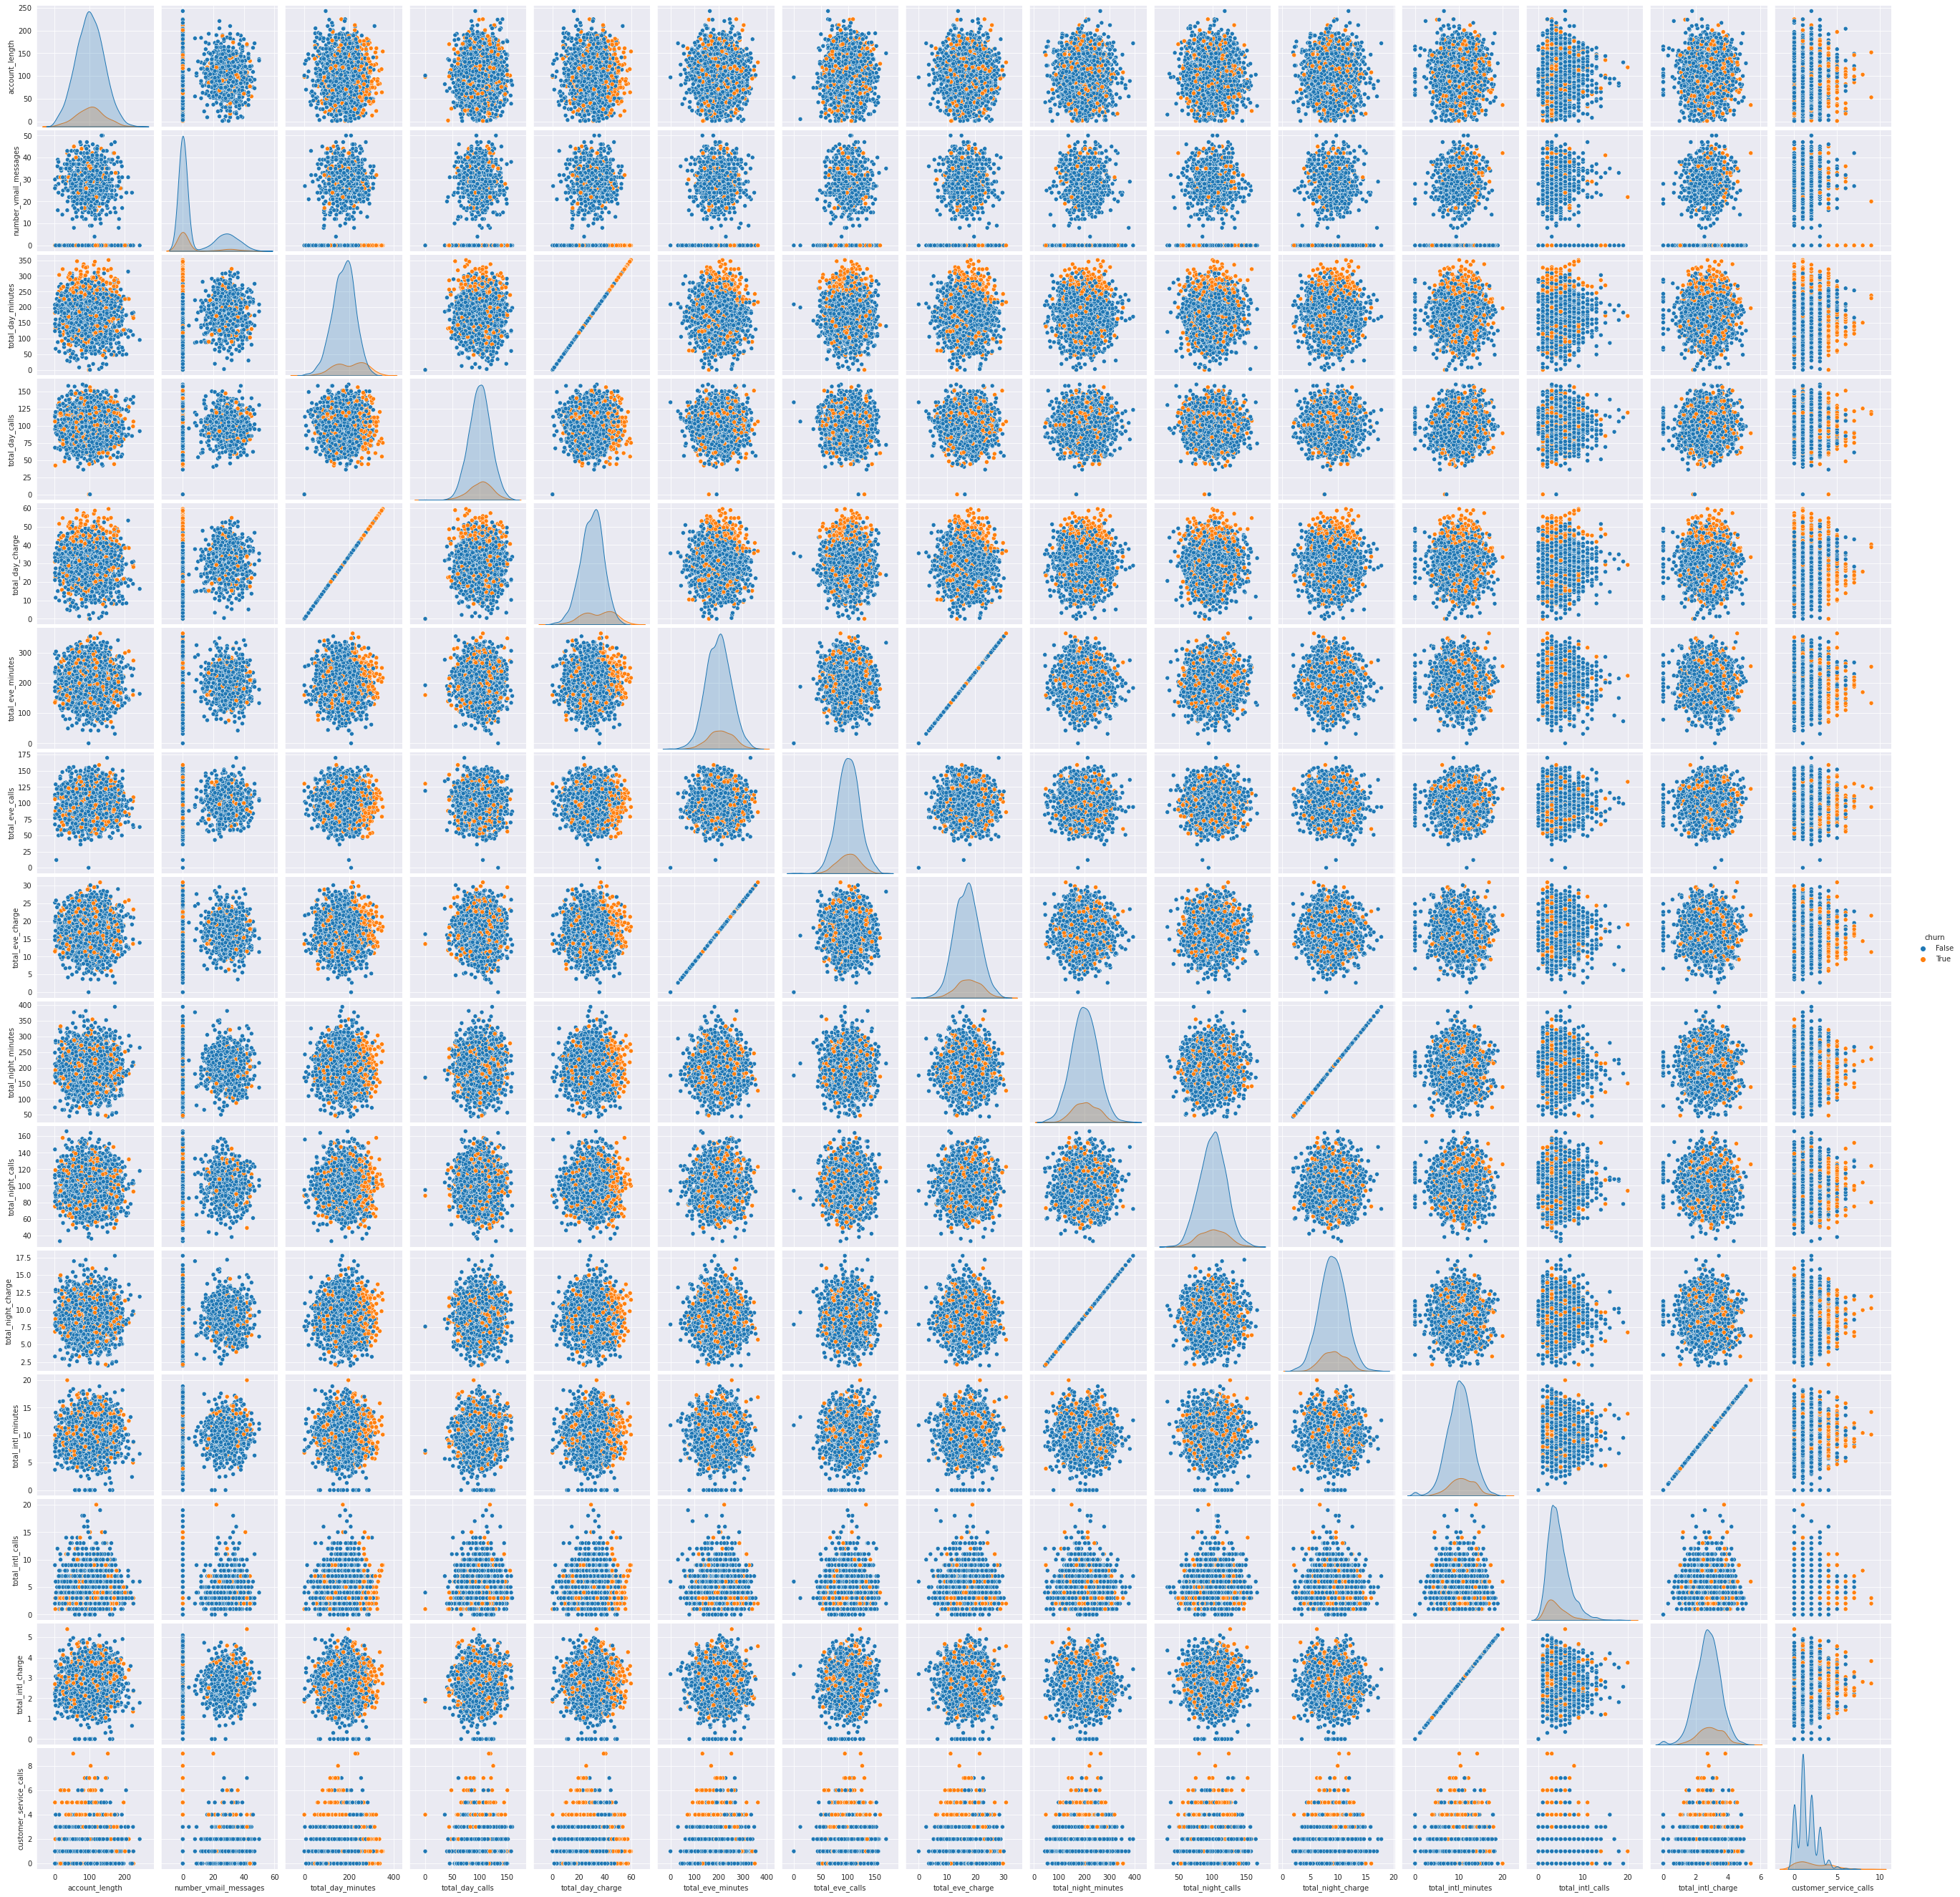

In [27]:
plt.figure(figsize=(40,20))
sns.pairplot(train, hue="churn")
plt.show();

In [28]:
cat_col = []
num_col = []
for col in list(train.columns):
    if is_categorical_dtype(train[col]):
        cat_col.append(col)
    elif is_numeric_dtype(train[col]):
        num_col.append(col)

In [29]:
num_col, cat_col

(['account_length',
  'number_vmail_messages',
  'total_day_minutes',
  'total_day_calls',
  'total_day_charge',
  'total_eve_minutes',
  'total_eve_calls',
  'total_eve_charge',
  'total_night_minutes',
  'total_night_calls',
  'total_night_charge',
  'total_intl_minutes',
  'total_intl_calls',
  'total_intl_charge',
  'customer_service_calls',
  'churn'],
 ['area_code', 'international_plan', 'voice_mail_plan', 'region'])

In [30]:
num_col.remove("churn")

In [31]:
len(num_col)

15

In [32]:
def multiple_cat_num_eda(num, cat):
    fig, axes = plt.subplots(nrows=len(num), ncols=len(cat), figsize = (30, 60))
    for i in range(len(num)):
        for j in range(len(cat)):
          #if var_list[i] != var_list[j]:
            sns.violinplot(x = cat[j], y = num[i], data = train, hue = "churn", ax = axes[i,j])
            ax = axes[i,j]
            ax.set_ylabel(num[i], fontsize=14)
            ax.set_xlabel(cat[j], fontsize=14)

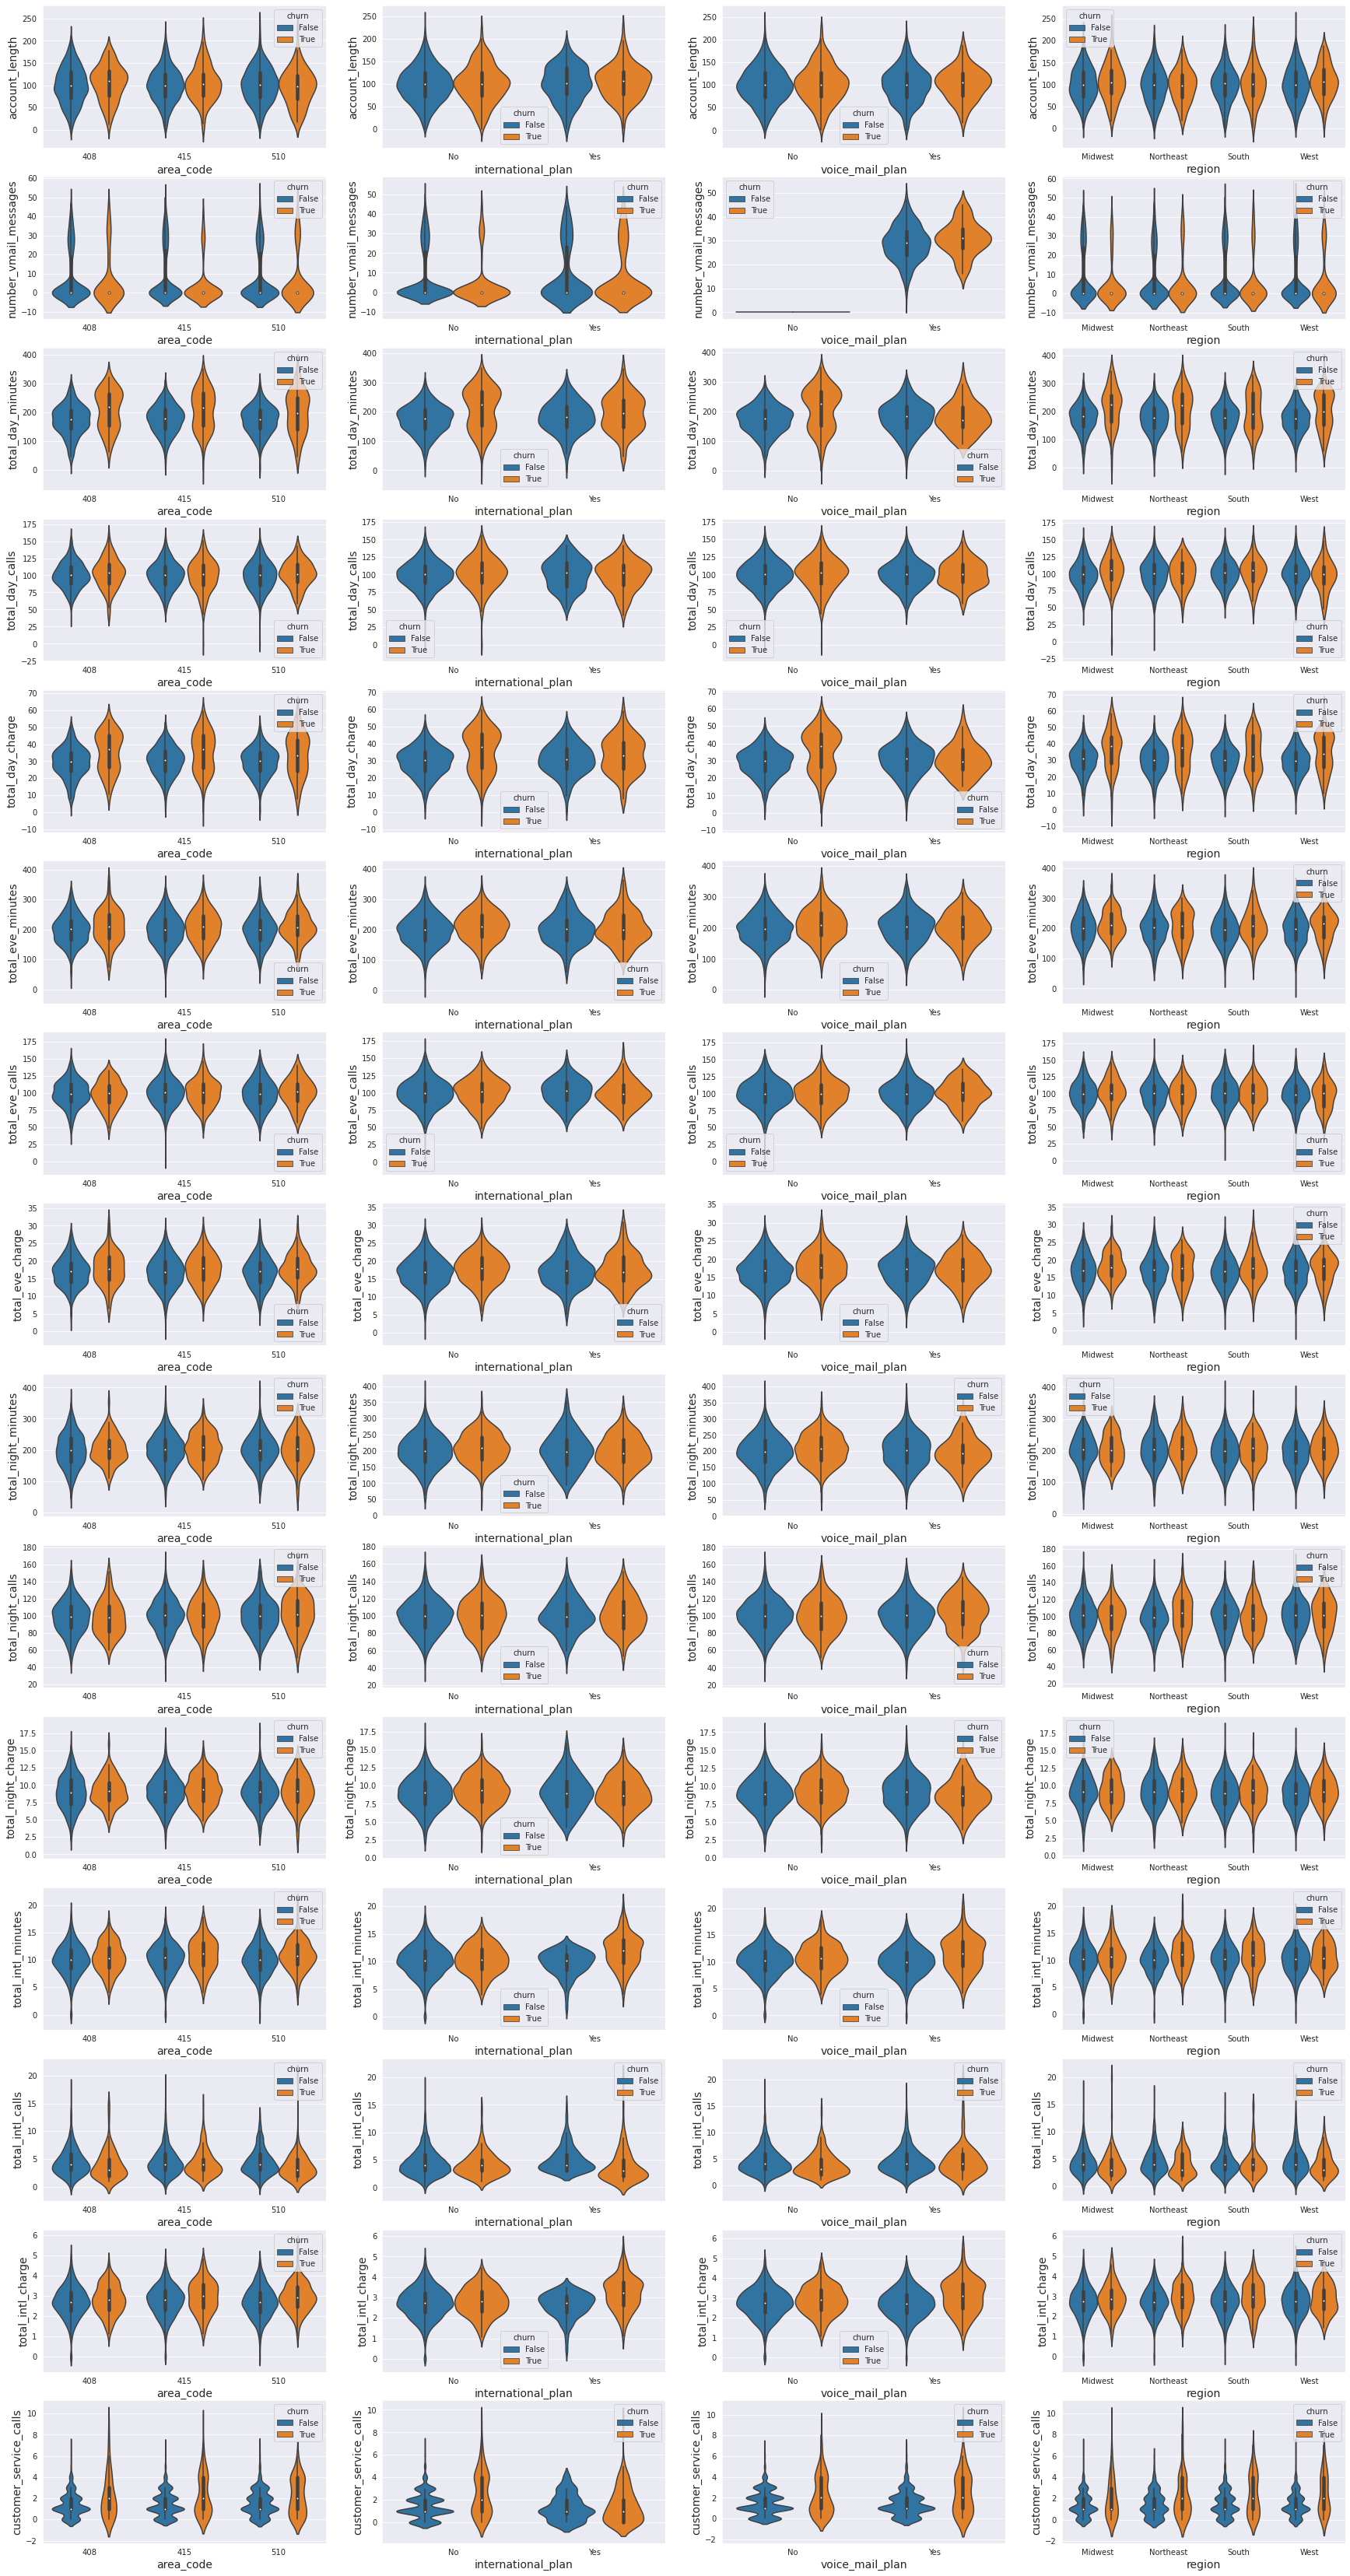

In [33]:
multiple_cat_num_eda(num_col, cat_col)

In [34]:
def cat_cat_churn(var1, var2):
    train_use = train[[var1, var2, "churn"]]
    train_use = train_use.groupby([var1, var2, "churn"], as_index = False).size()
    train_use = train_use.pivot_table(index = [var1, var2], columns = "churn", values = "size")
    train_use = train_use.rename(columns = {0: "No", 1: "Yes"})
    train_use["prop_churn"] = train_use["Yes"] / (train_use["No"] + train_use["Yes"])
    train_use = train_use.fillna(0)
    train_use["group"] = train_use.index
    train_use = train_use.reset_index(drop = True)
    train_use = train_use.rename_axis(None, axis=1)
      #train_use["group"]
    train_use[var1] = train_use["group"].str.get(0)
    train_use[var2] = train_use["group"].str.get(1)
    train_use = train_use.drop(["group"], axis = 1)
    train_use = train_use.rename_axis(None, axis=0)
    pivot_df = train_use.pivot(var1, var2, "prop_churn")
    return pivot_df
     

In [35]:
def multiple_cat_cat_eda(var_list):
    fig, axes = plt.subplots(nrows=len(var_list), ncols=len(var_list), figsize = (40, 60))
    for i in range(len(var_list)):
        for j in range(len(var_list)):
            if var_list[i] != var_list[j]:
                new_df = cat_cat_churn(var_list[i], var_list[j])
                sns.heatmap(new_df, annot=True, fmt=".2f", linewidths=.5, cmap="RdBu", ax=axes[i,j])
                ax = axes[i,j]
                ax.set_ylabel(var_list[i], fontsize=8)
                ax.set_xlabel(var_list[j], fontsize=8)
            else:
                sns.countplot(x = var_list[i], data = train, ax=axes[i,i])
                ax = axes[i,i]
                ax.set_xlabel(var_list[i], fontsize=8)
                ax.set_ylabel(var_list[i], fontsize=8)

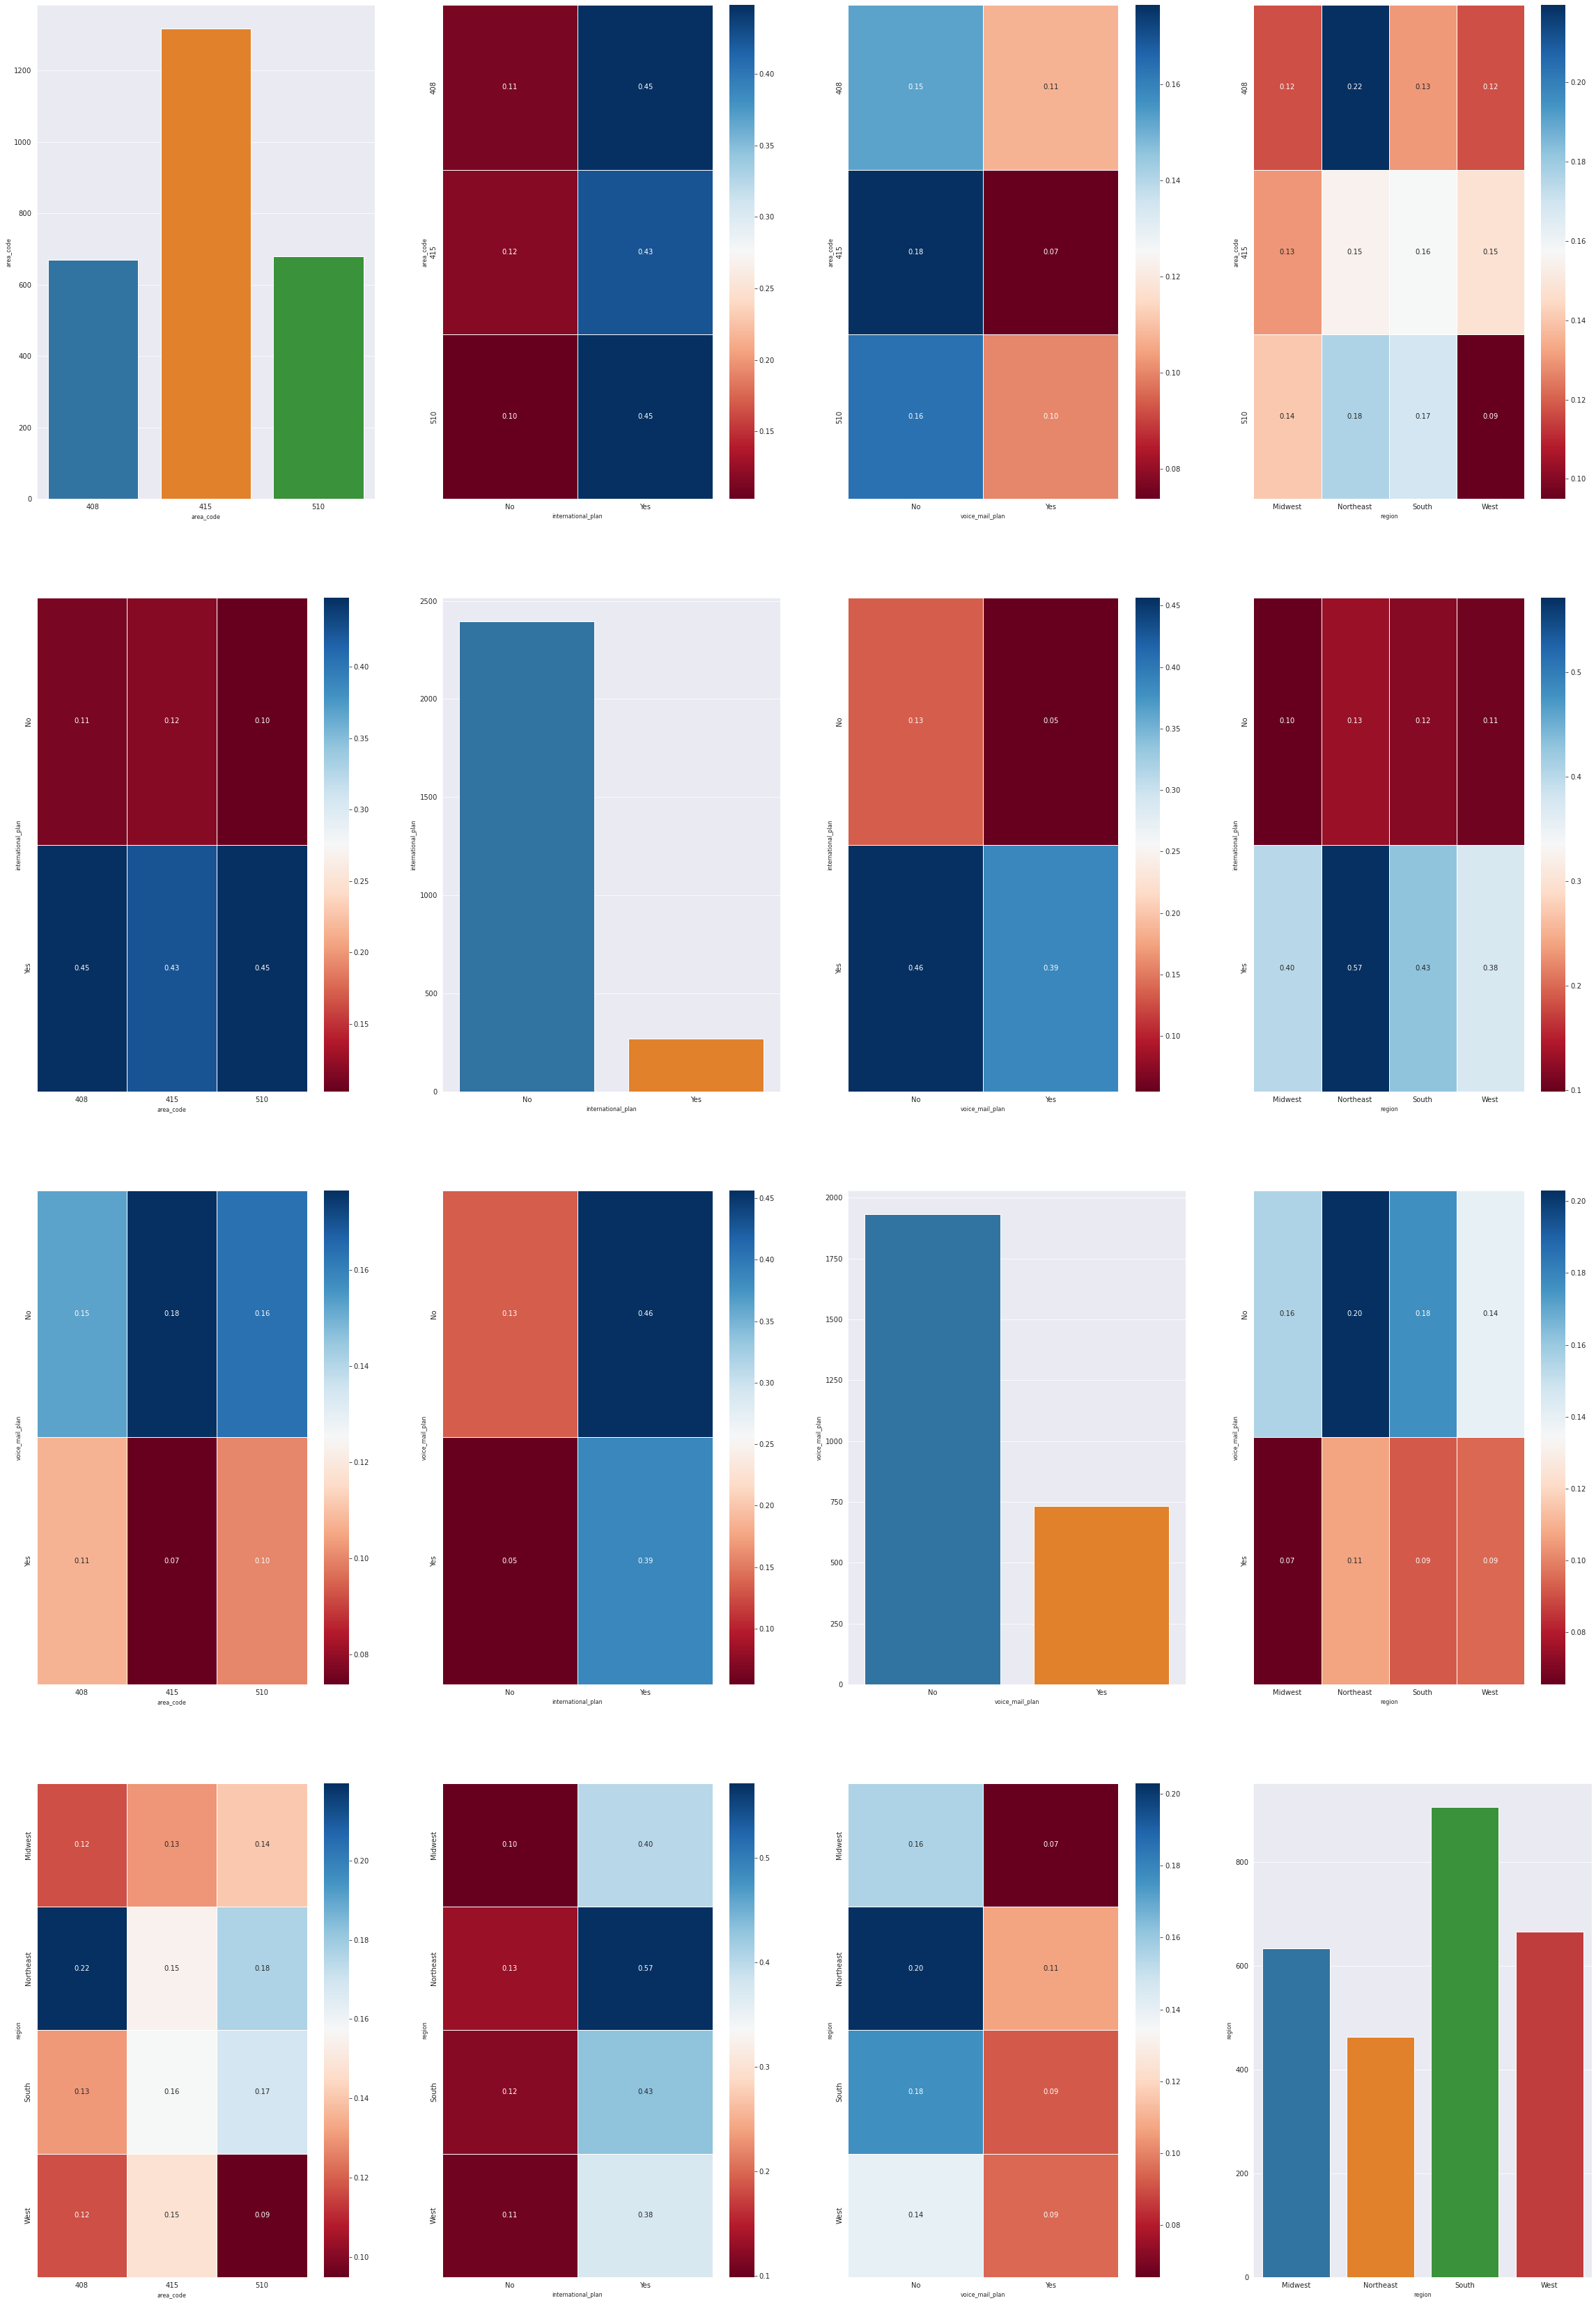

In [36]:
multiple_cat_cat_eda(cat_col)